In [151]:
#I'm importing the libaries that wll help me execute my code
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
#I'm importing my datset using pandas
df= pd.read_excel("Dots Potential Customer Survey Data.xlsx")

#i was checking the first five dataset information;l
df.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [4]:
#Checking the shape of my dataset
df.shape
# and i found out that i have 3220 rows and 29 colunms

(3220, 29)

In [5]:
#checking the information of my dataset
df.info()
# and i found out that our dataset doesnot have any null values,and has two type of data types which are int and objects



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

In [6]:
#I was checking the summary of the dataset
df.describe()

,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,4.988139e+06,44.834161,20578.639130,4.347205,1.991925,1.700621,8.162733,7.648447,106.011801,0.334783,...,0.706211,4.450932,0.607764,0.584783,0.247826,0.450932,0.568944,0.606522,0.310870,0.548137
std,2.867911e+06,19.073161,15079.429422,2.807803,1.205222,1.190910,2.759419,2.260047,15.414674,0.471988,...,0.455567,2.454004,0.488325,0.492836,0.431817,0.497664,0.495301,0.488597,0.462921,0.497755
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,-1.000000,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516499e+06,29.000000,8494.000000,2.000000,1.000000,1.000000,6.000000,6.000000,95.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.041256e+06,44.000000,16982.000000,4.000000,2.000000,2.000000,8.000000,8.000000,106.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.459871e+06,60.000000,30965.250000,6.000000,3.000000,3.000000,10.000000,9.000000,116.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,18.000000,17.000000,161.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Cchecking my datset has duplicates
df[df.duplicated()]

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs


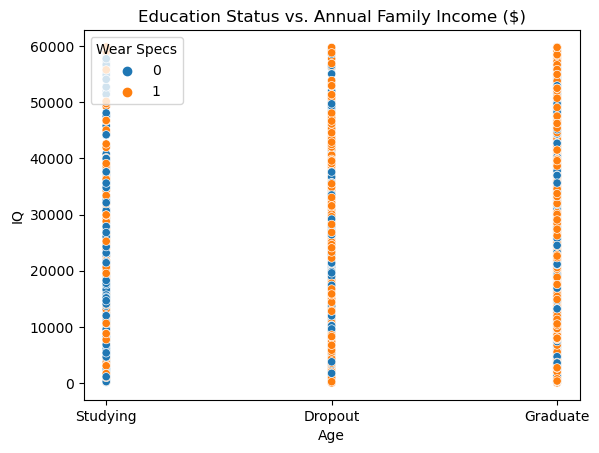

In [8]:
sns.scatterplot(data=df, x= 'Education Status', y= 'Annual Family Income ($)', hue='Wear Specs')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.title( 'Education Status vs. Annual Family Income ($)')
plt.show()

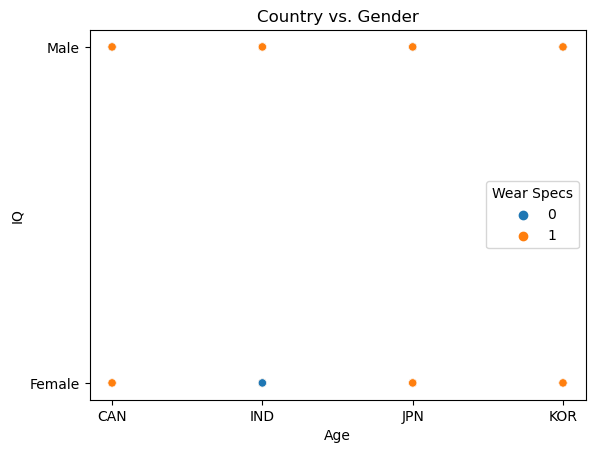

In [10]:
sns.scatterplot(data=df, x= 'Country', y= 'Gender', hue='Wear Specs')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.title( 'Country vs. Gender')
plt.show()

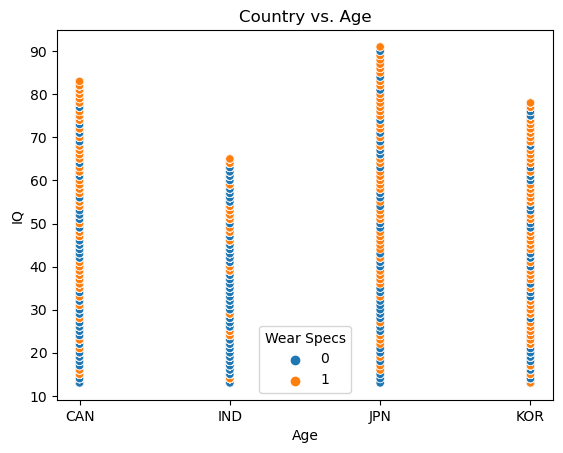

In [12]:
sns.scatterplot(data=df, x= 'Country', y= 'Age', hue='Wear Specs')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.title( 'Country vs. Age')
plt.show()

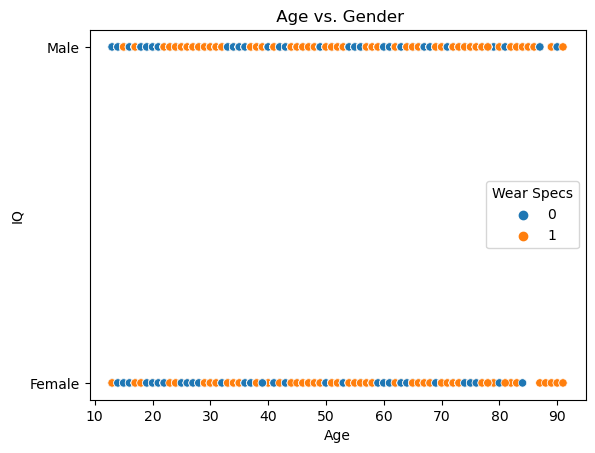

In [17]:
sns.scatterplot(data=df, x= 'Age', y= 'Gender', hue='Wear Specs')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.title( ' Age vs. Gender')
plt.show()

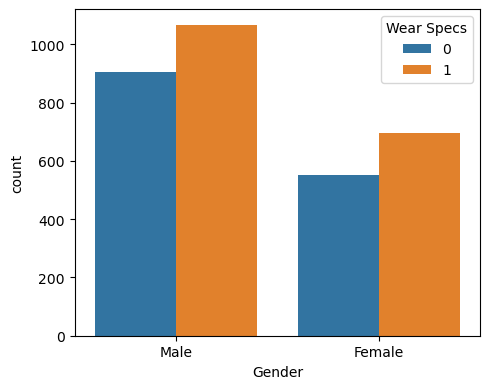

In [20]:
plt.figure(figsize=(5,4))


sns.countplot(x='Gender', data=df, hue='Wear Specs')
plt.tight_layout()



C:\Users\octav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


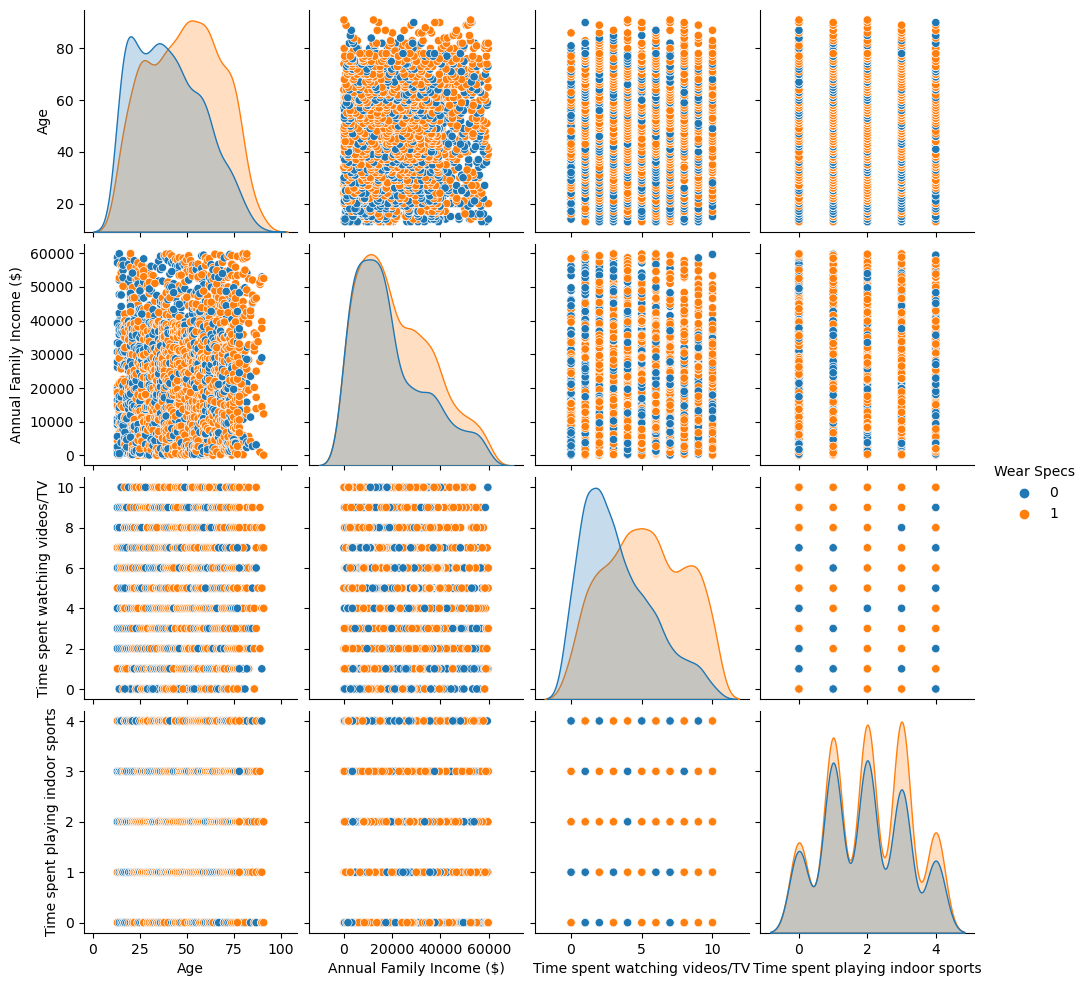

In [21]:
sns.pairplot(data=df, vars=['Age', 'Annual Family Income ($)','Time spent watching videos/TV','Time spent playing indoor sports'],hue='Wear Specs')
plt.show()

C:\Users\octav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


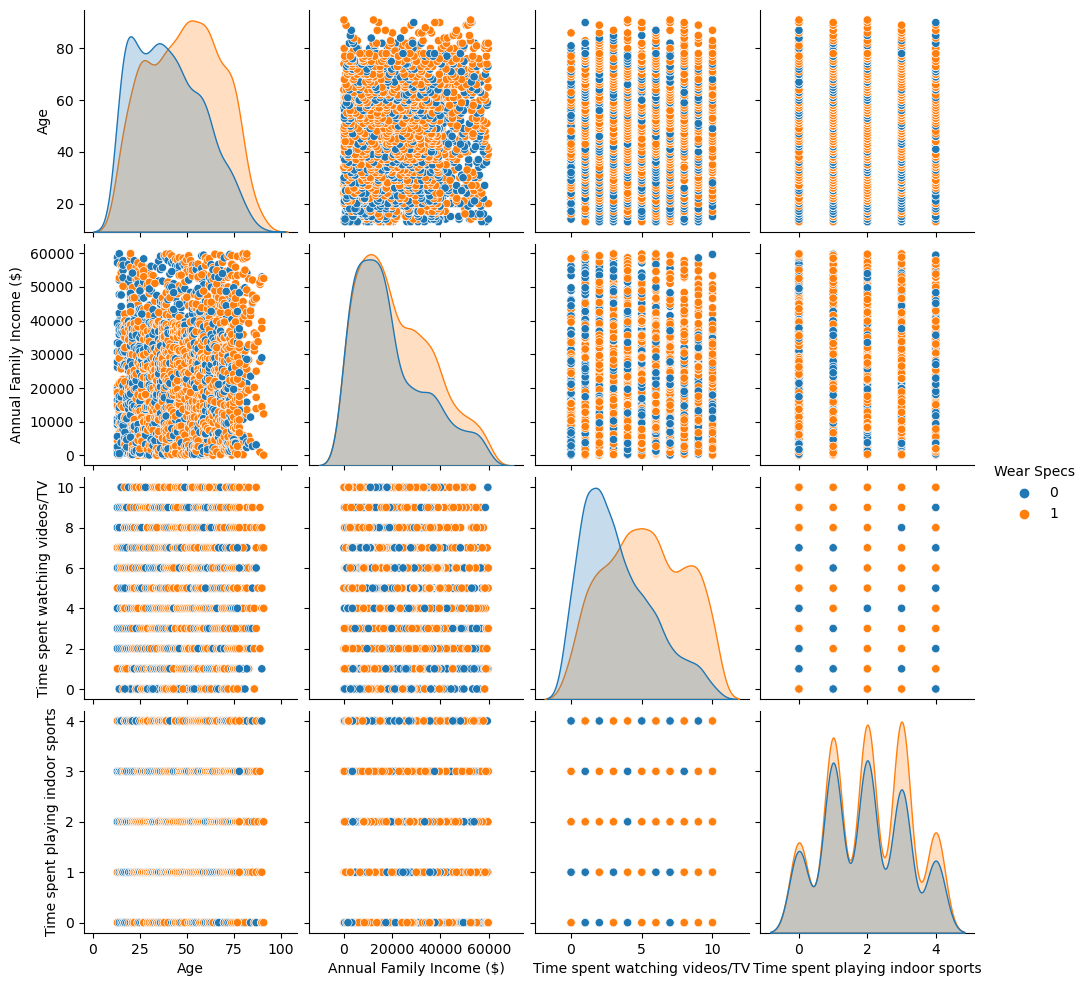

In [22]:
sns.pairplot(data=df, vars=['Age', 'Annual Family Income ($)','Time spent watching videos/TV','Time spent playing indoor sports'],hue='Wear Specs')
plt.show()

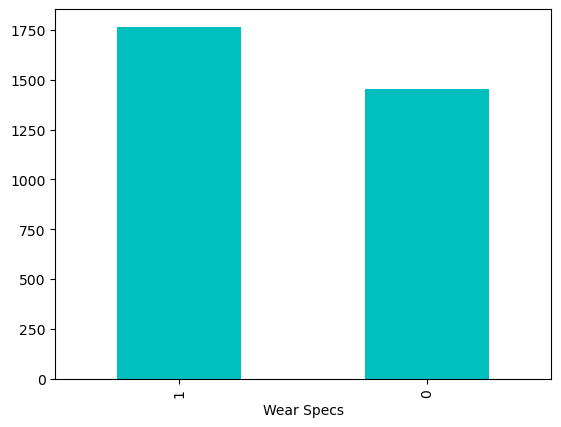

In [23]:
df["Wear Specs"].value_counts().plot(kind="bar",color="c")
plt.show()

<Axes: title={'center': 'Feature-correlation (pearson)'}>

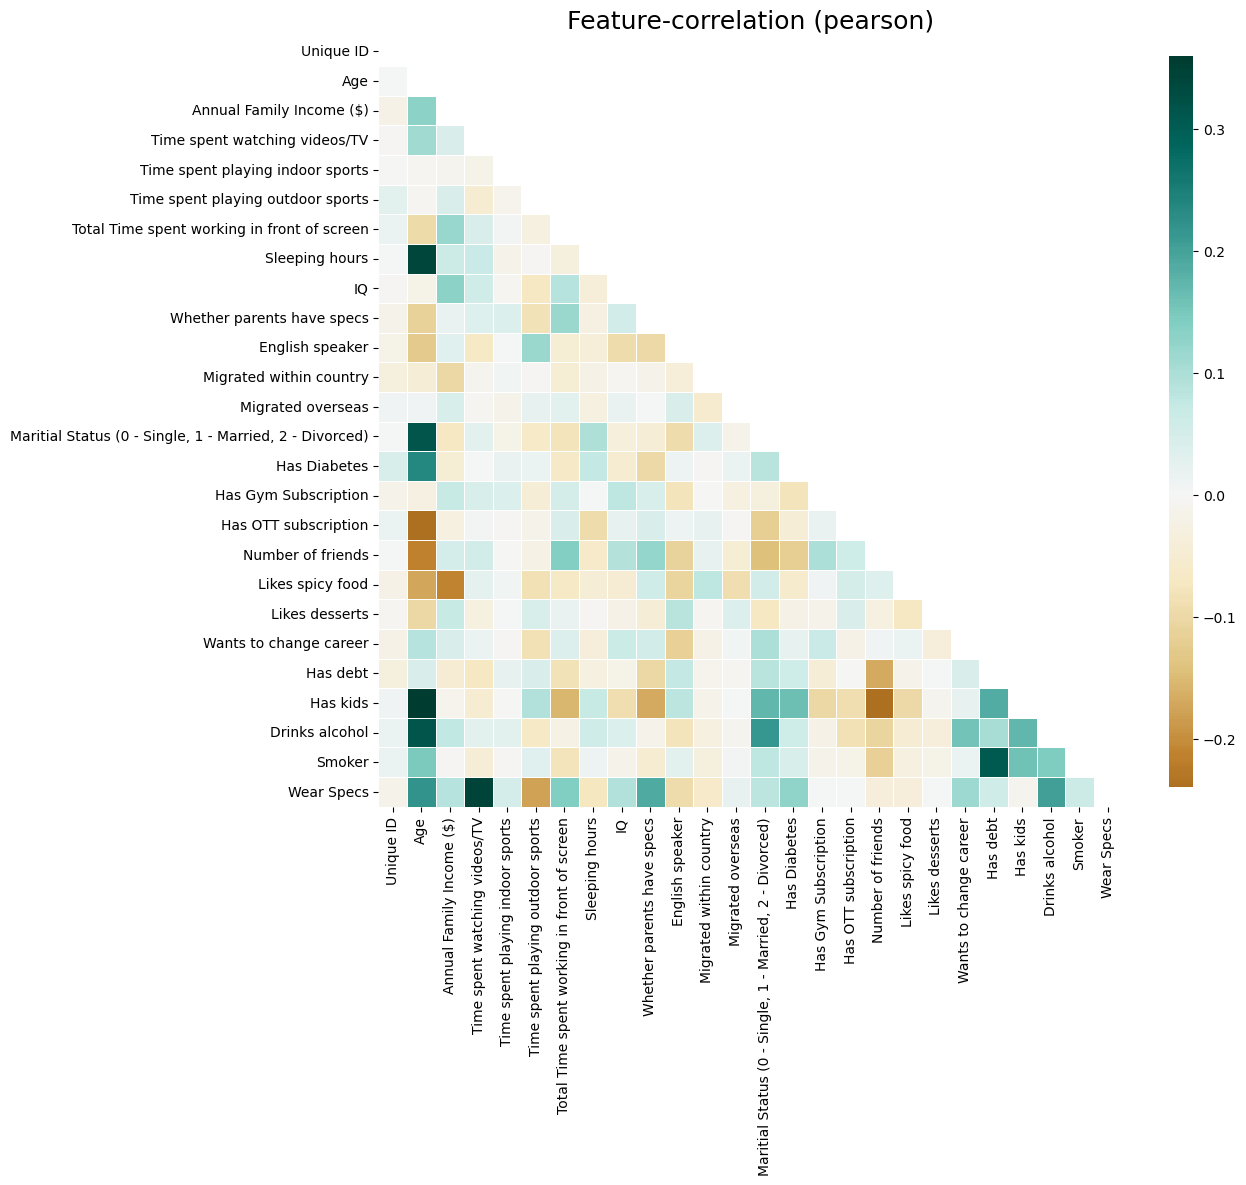

In [25]:
#corrolation for my entire dataset
klib.corr_plot(df, annot=False)

In [27]:
#Finding color coded corrolation matrics of the numerical overview of the correlations between the features.
klib.corr_mat(df)

,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,English speaker,Migrated within country,Migrated overseas,"Maritial Status (0 - Single, 1 - Married, 2 - Divorced)",Has Diabetes,Has Gym Subscription,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
Unique ID,1.00,0.00,-0.02,-0.01,-0.00,0.03,0.02,0.00,-0.01,-0.01,-0.02,-0.03,0.01,0.00,0.05,-0.02,0.02,0.00,-0.02,-0.01,-0.02,-0.03,0.01,0.02,0.01,-0.02
Age,0.00,1.00,0.13,0.11,-0.01,-0.01,-0.10,0.34,-0.02,-0.11,-0.13,-0.04,0.01,0.31,0.24,-0.03,-0.24,-0.22,-0.17,-0.10,0.09,0.04,0.41,0.32,0.15,0.22
Annual Family Income ($),-0.02,0.13,1.00,0.04,-0.01,0.04,0.12,0.06,0.13,0.02,0.03,-0.10,0.05,-0.07,-0.05,0.07,-0.03,0.05,-0.21,0.07,0.05,-0.05,-0.01,0.08,-0.00,0.09
Time spent watching videos/TV,-0.01,0.11,0.04,1.00,-0.02,-0.05,0.05,0.07,0.06,0.03,-0.07,-0.01,-0.01,0.03,-0.00,0.05,0.00,0.05,0.03,-0.03,0.02,-0.07,-0.05,0.03,-0.05,0.34
Time spent playing indoor sports,-0.00,-0.01,-0.01,-0.02,1.00,-0.01,0.01,-0.01,-0.01,0.04,0.00,0.01,-0.01,-0.02,0.02,0.04,-0.00,-0.00,0.01,0.00,-0.00,0.02,-0.00,0.03,-0.00,0.05
Time spent playing outdoor sports,0.03,-0.01,0.04,-0.05,-0.01,1.00,-0.03,-0.00,-0.07,-0.08,0.12,-0.00,0.02,-0.06,0.01,-0.04,-0.01,-0.02,-0.09,0.05,-0.09,0.04,0.09,-0.07,0.03,-0.18
Total Time spent working in front of screen,0.02,-0.10,0.12,0.05,0.01,-0.03,1.00,-0.03,0.09,0.12,-0.05,-0.05,0.03,-0.08,-0.06,0.05,0.04,0.14,-0.07,0.02,0.04,-0.08,-0.16,-0.02,-0.08,0.14
Sleeping hours,0.00,0.34,0.06,0.07,-0.01,-0.00,-0.03,1.00,-0.04,-0.03,-0.04,-0.02,-0.03,0.10,0.08,0.00,-0.09,-0.06,-0.04,-0.01,-0.04,-0.03,0.07,0.06,0.01,-0.07
IQ,-0.01,-0.02,0.13,0.06,-0.01,-0.07,0.09,-0.04,1.00,0.05,-0.09,-0.01,0.02,-0.03,-0.05,0.08,0.02,0.09,-0.05,-0.02,0.07,-0.02,-0.09,0.04,-0.02,0.09
Whether parents have specs,-0.01,-0.11,0.02,0.03,0.04,-0.08,0.12,-0.03,0.05,1.00,-0.10,-0.02,0.00,-0.04,-0.10,0.05,0.05,0.12,0.06,-0.04,0.05,-0.10,-0.17,-0.02,-0.05,0.19


In [64]:
#I will calculate the Pearson correlation coefficient between the target variable "Wear Specs" and the other variables in the dataset.
wear_specs_correlations = df1.corr()['Wear Specs'].sort_values(ascending=False)
print("Correlation Coefficients with 'Wear Specs':")
print(wear_specs_correlations)

Correlation Coefficients with 'Wear Specs':
Wear Specs                                                 1.000000
Time spent watching videos/TV                              0.342571
Age                                                        0.221421
Drinks alcohol                                             0.205002
Whether parents have specs                                 0.190556
Total Time spent working in front of screen                0.139726
Country_KOR                                                0.127212
Has Diabetes                                               0.126125
Wants to change career                                     0.115028
IQ                                                         0.094830
Annual Family Income ($)                                   0.089451
Education Status_Graduate                                  0.088766
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0.083085
Smoker                                                     0.063791
Has 

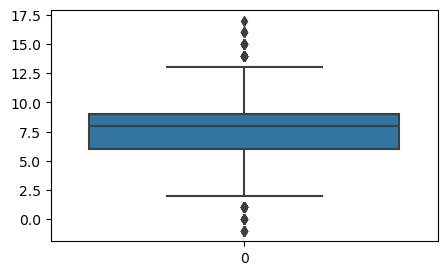

In [45]:

plt.figure(figsize=(5,3))
sns.boxplot(df['Sleeping hours'])
plt.show()

In [46]:
Q1= np.percentile(df['Sleeping hours'],25)
Q3= np.percentile(df['Sleeping hours'],75)
IQR= Q3-Q1

upper_limit= Q3+ (1.5* IQR)
lower_limit= Q1- (1.5* IQR)
upper_limit,lower_limit

print(lower_limit,upper_limit,IQR)

1.5 13.5 3.0


In [49]:
selected_column = df['Sleeping hours']

for data_point in selected_column:
    if data_point < lower_limit:
      
        pass
    elif data_point > upper_limit:
        
        pass
    else:
        
        pass
    
    below_lower_limit = []
above_upper_limit = []

for data_point in selected_column:
    if data_point < lower_limit:
        below_lower_limit.append(data_point)  
    elif data_point > upper_limit:
        above_upper_limit.append(data_point) 


In [50]:
median_within_range = np.median(df[(df['Sleeping hours'] >= lower_limit) & (df['Sleeping hours'] <= upper_limit)]['Sleeping hours'])
df.loc[df['Sleeping hours'] > upper_limit, 'Sleeping hours'] = median_within_range

df.loc[df['Sleeping hours'] < lower_limit, 'Sleeping hours'] = median_within_range

<Axes: >

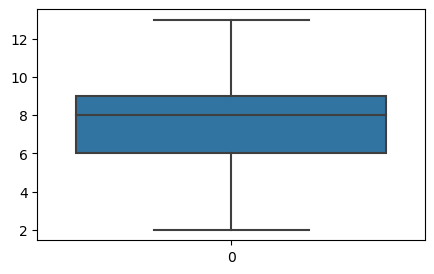

In [51]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Sleeping hours'])

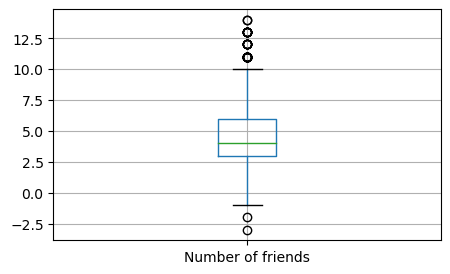

In [52]:
plt.figure(figsize=(5,3))
df.boxplot(column='Number of friends')
plt.show()

In [55]:
Q1= df['Number of friends'].quantile(0.25)
Q3= df['Number of friends'].quantile(0.75)
IQR= Q3-Q1

upper_limit= Q3+ (1.5* IQR)
lower_limit= Q1- (1.5* IQR)
upper_limit,lower_limit

print(lower_limit,upper_limit,IQR)

-1.5 10.5 3.0


In [56]:
selected_column = df['Number of friends']

for data_point in selected_column:
    if data_point < lower_limit:
        
        pass
    elif data_point > upper_limit:
        
        pass
    else:
        
        pass
    
    below_lower_limit = []
above_upper_limit = []

for data_point in selected_column:
    if data_point < lower_limit:
        below_lower_limit.append(data_point)  
    elif data_point > upper_limit:
        above_upper_limit.append(data_point) 

In [57]:
median_within_range = np.median(df[(df['Number of friends'] >= lower_limit) & (df['Number of friends'] <= upper_limit)]['Number of friends'])
df.loc[df['Number of friends'] > upper_limit, 'Number of friends'] = median_within_range

df.loc[df['Number of friends'] < lower_limit, 'Number of friends'] = median_within_range

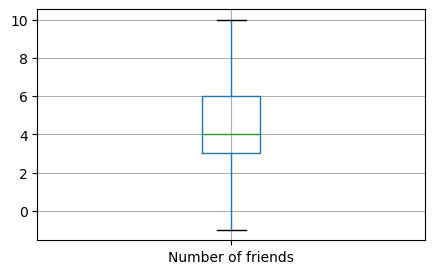

In [58]:
plt.figure(figsize=(5,3))
df.boxplot(column='Number of friends')
plt.show()

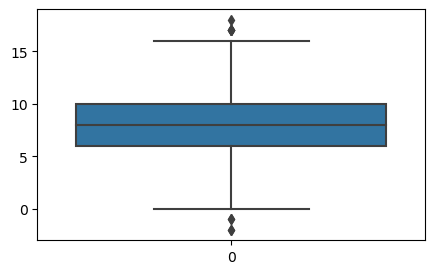

In [59]:
plt.figure(figsize=(5,3))
sns.boxplot(df[ 'Total Time spent working in front of screen'])
plt.show()

In [60]:
Q1= np.percentile(df['Total Time spent working in front of screen'],25)
Q3= np.percentile(df['Total Time spent working in front of screen'],75)
IQR= Q3-Q1

upper_limit= Q3+ (1.5* IQR)
lower_limit= Q1- (1.5* IQR)
upper_limit,lower_limit

print(lower_limit,upper_limit,IQR)

0.0 16.0 4.0


In [61]:
selected_column = df['Total Time spent working in front of screen']

for data_point in selected_column:
    if data_point < lower_limit:
        
        pass
    elif data_point > upper_limit:
        
        pass
    else:
        
        pass
    
    below_lower_limit = []
above_upper_limit = []

for data_point in selected_column:
    if data_point < lower_limit:
        below_lower_limit.append(data_point)  
    elif data_point > upper_limit:
        above_upper_limit.append(data_point) 

In [62]:
median_within_range = np.median(df[(df['Total Time spent working in front of screen'] >= lower_limit) & (df['Total Time spent working in front of screen'] <= upper_limit)]['Total Time spent working in front of screen'])
df.loc[df['Total Time spent working in front of screen'] > upper_limit, 'Total Time spent working in front of screen'] = median_within_range

df.loc[df['Total Time spent working in front of screen'] < lower_limit, 'Total Time spent working in front of screen'] = median_within_range

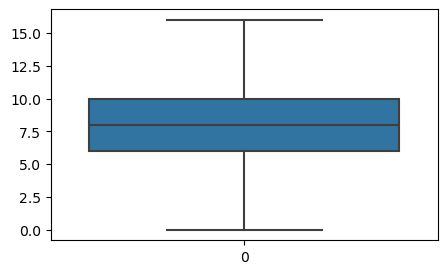

In [63]:
plt.figure(figsize=(5,3))
sns.boxplot(df[ 'Total Time spent working in front of screen'])
plt.show()

In [53]:
Q1= df['Number of friends'].quantile(0.25)
Q3= df['Number of friends'].quantile(0.75)
IQR= Q3-Q1

upper_limit= Q3+ (1.5* IQR)
lower_limit= Q1- (1.5* IQR)
upper_limit,lower_limit

print(lower_limit,upper_limit,IQR)

-1.5 10.5 3.0


# CATAGORICAL COLUNMS

In [35]:
df1= pd.get_dummies(df,columns=["Education Status","Country","Gender"],dtype=int,drop_first=True)

In [36]:
df1.head()

,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has kids,Drinks alcohol,Smoker,Wear Specs,Education Status_Graduate,Education Status_Studying,Country_IND,Country_JPN,Country_KOR,Gender_Male
0,7319483,13,20423,3,4,3,7,8,95,1,...,0,0,0,1,0,1,0,0,0,1
1,4791965,13,5570,3,3,1,10,3,120,1,...,0,0,1,1,0,1,0,0,0,0
2,2991718,13,58706,2,2,1,4,9,114,0,...,0,0,0,0,0,1,0,0,0,0
3,4220106,13,57118,6,2,4,10,11,117,0,...,0,0,0,0,0,1,0,0,0,1
4,2263008,14,59834,6,3,4,13,12,117,1,...,0,0,0,0,0,1,0,0,0,1


In [119]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
X= df1.drop(columns=["Unique ID","Wear Specs"], axis=1)
y=df1['Wear Specs']

In [251]:

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state= 42)

In [252]:
rf = RandomForestClassifier()


In [253]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [254]:
y_pred1= rf.predict(X_test)

In [255]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       302
           1       0.76      0.86      0.81       342

    accuracy                           0.78       644
   macro avg       0.79      0.78      0.78       644
weighted avg       0.79      0.78      0.78       644



In [274]:
features=pd.DataFrame(gbc.feature_importances_,index=X.columns)

In [275]:
features

,0
Age,0.090279
Annual Family Income ($),0.016876
Time spent watching videos/TV,0.262630
Time spent playing indoor sports,0.006720
Time spent playing outdoor sports,0.066209
Total Time spent working in front of screen,0.065893
Sleeping hours,0.069888
IQ,0.033361
Whether parents have specs,0.084725
English speaker,0.001521


In [288]:
rf2=RandomForestClassifier(n_estimators=1000,
                           criterion="entropy",
                           min_samples_split=10,
                           max_depth=14, 
                           random_state =42)

In [290]:
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [292]:
pred=rf2.predict(X_test)

In [293]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       302
           1       0.77      0.86      0.81       342

    accuracy                           0.79       644
   macro avg       0.79      0.78      0.78       644
weighted avg       0.79      0.79      0.79       644



In [256]:
dtc=DecisionTreeClassifier()

In [257]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [258]:
y_pred2=dtc.predict(X_test)

In [259]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       302
           1       0.69      0.70      0.70       342

    accuracy                           0.68       644
   macro avg       0.67      0.67      0.67       644
weighted avg       0.68      0.68      0.68       644



In [260]:
model=LogisticRegression()

In [261]:
model.fit(X_train,y_train)

LogisticRegression()

In [262]:
y_pred3= model.predict(X_test)

In [263]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       302
           1       0.72      0.78      0.75       342

    accuracy                           0.72       644
   macro avg       0.72      0.71      0.72       644
weighted avg       0.72      0.72      0.72       644



In [264]:
svc=SVC()





SVC_Model.fit(X_train,y_train)

In [265]:
svc.fit(X_train,y_train)

SVC()

In [266]:
y_pred4= svc.predict(X_test)

In [267]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.53      1.00      0.69       342

    accuracy                           0.53       644
   macro avg       0.27      0.50      0.35       644
weighted avg       0.28      0.53      0.37       644



In [268]:
gbc= GradientBoostingClassifier()

In [269]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [270]:
y_pred5=gbc.predict(X_test)

In [271]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       302
           1       0.77      0.85      0.81       342

    accuracy                           0.79       644
   macro avg       0.79      0.78      0.79       644
weighted avg       0.79      0.79      0.79       644



In [272]:
features=pd.DataFrame(gbc.feature_importances_,index=X.columns)

In [273]:
features

,0
Age,0.090279
Annual Family Income ($),0.016876
Time spent watching videos/TV,0.262630
Time spent playing indoor sports,0.006720
Time spent playing outdoor sports,0.066209
Total Time spent working in front of screen,0.065893
Sleeping hours,0.069888
IQ,0.033361
Whether parents have specs,0.084725
English speaker,0.001521
